In [74]:
import glob
import os
import re

import pandas as pd
import matplotlib.pyplot as plt
from Bio import SeqIO
from Bio import pairwise2

In [25]:
def umi_histogram(fastq_path, max_count):
    conscount_values = []
    
    # Regular expression to find CONSCOUNT field and extract the number
    pattern = re.compile(r"CONSCOUNT=(\d+)")

    # Parse the fastq file
    with open(fastq_path, "r") as handle:
        for record in SeqIO.parse(handle, "fastq"):
            match = pattern.search(record.description)
            if match:
                conscount = int(match.group(1))
                # All values greater than max_count are set to max_count
                conscount = min(conscount, max_count)
                conscount_values.append(conscount)
    
    # Plot the histogram
    # bins should be one more than max_count to include the last bin
    plt.hist(conscount_values, bins=max_count+1, range=(0, max_count+1), edgecolor='black')
    
    fastq_basename = fastq_path.split('/')[-1]
    plt.title(f'Distribution of CONSCOUNT for {fastq_basename}')
    plt.xlabel('CONSCOUNT')
    plt.ylabel('Frequency')
    
    ticks = list(range(0, max_count + 1))
    labels = [str(i) for i in range(0, max_count)] + [f"=>{max_count}"]
    plt.xticks(ticks, labels, rotation=90)
    
    plt.show()


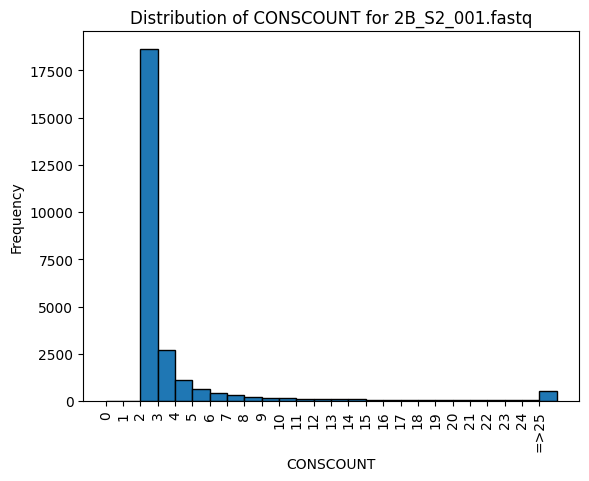

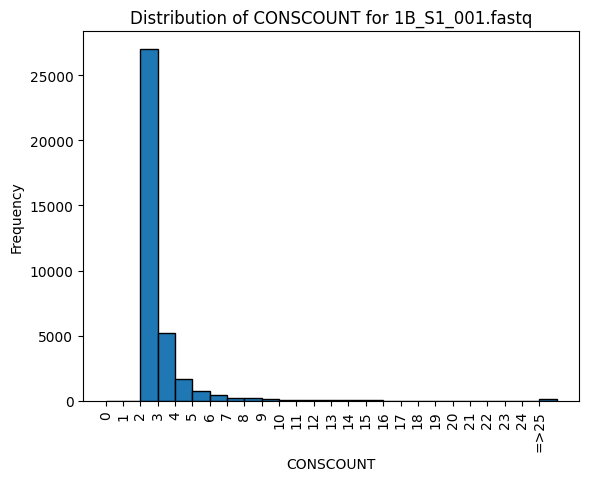

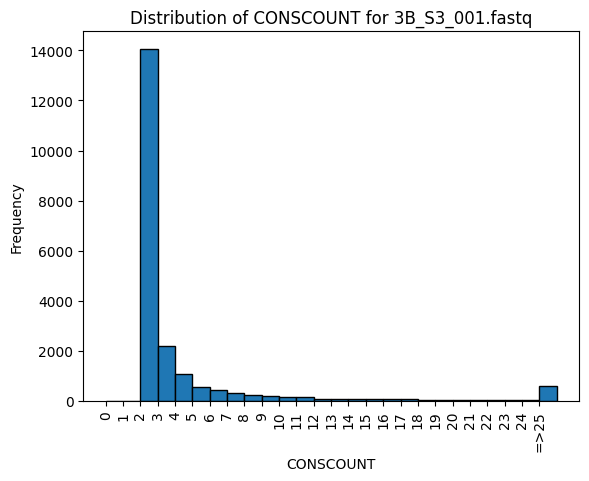

In [26]:
for path in glob.glob("/Users/matsen/re/gcreplay/nextflow/data/passenger/test_run/unique_with_at_least_two_reads/*.fastq"):
    umi_histogram(path, 25)


In [78]:
def process_excel_sequences(file_path):
    df = pd.read_excel(file_path)
    
    # Filter the DataFrame based on the conditions
    v_gene_condition = df['V-GENE and allele'].str.contains('IGKV6-15\\*01 F', na=False)
    j_gene_condition = df['J-GENE and allele'].str.contains('IGKJ4\\*01 F', na=False)
    filtered_df = df[v_gene_condition & j_gene_condition]

    summary_dict = {
        "all_seq": len(df), 
        "all_unique": df['Sequence'].nunique(), 
        "VJ_correct_seq": len(filtered_df), 
        "VJ_correct_unique": filtered_df['Sequence'].nunique()}
    
    return summary_dict, filtered_df


summary_dicts = []
concatenated_df = pd.DataFrame()

# Loop over all the xlsx files in the directory
for file_path in glob.glob("/Users/matsen/re/gcreplay/nextflow/data/passenger/test_run/unique_with_at_least_two_reads/[123]*.xlsx"):
    basename = os.path.splitext(os.path.basename(file_path))[0]
    
    summary_dict, filtered_df = process_excel_sequences(file_path)
    
    sub_df = filtered_df[['Sequence number', 'Sequence']].copy()
    sub_df['dataset'] = basename  
    
    # Concatenate the DataFrame to the existing concatenated DataFrame
    concatenated_df = pd.concat([concatenated_df, sub_df], ignore_index=True)
    
    # Add the basename to the summary_dict
    summary_dict['basename'] = basename
    
    # Append the summary_dict to the list
    summary_dicts.append(summary_dict)
    
# Create a DataFrame from the list of summary dicts
df_summary = pd.DataFrame(summary_dicts)

# Now, concatenated_df holds the concatenated DataFrames with 'Sequence number', 'Sequence', and 'dataset' columns.
# And df_summary holds the summary information from all the excel files.



             all_seq  all_unique  VJ_correct_seq  VJ_correct_unique
basename                                                           
1_Summary1B    36373       31794             410                361
1_Summary2B    25637       20848            4435               3881
1_Summary3B    20703       15927            2223               1881


In [81]:
filtered_df.columns
filtered_df.head()

,Sequence number,Sequence ID,V-DOMAIN Functionality,V-GENE and allele,V-REGION score,V-REGION identity %,V-REGION identity nt,V-REGION identity % (with ins/del events),V-REGION identity nt (with ins/del events),J-GENE and allele,...,Sequence number.1,Sequence ID.1,V-GENE and allele.1,V-REGION,FR1-IMGT,CDR1-IMGT,FR2-IMGT,CDR2-IMGT,FR3-IMGT,CDR3-IMGT
10,11,TTATGAACCAATAGTCC|PRCONS=TS-shift1|SEQORIENT=F|CR,productive,Musmus IGKV6-15*01 F,1377.0,99.28,277/279 nt,NaN,NaN,Musmus IGKJ4*01 F,...,11,TTATGAACCAATAGTCC|PRCONS=TS-shift1|SEQORIENT=F|CR,Musmus IGKV6-15*01 F,"c15>t, T5; T5 acc 13-15>T act|c199>a, R67; R67...","c15>t, T5; T5 acc 13-15>T act|",NaN,NaN,NaN,"c199>a, R67; R67 cgg 199-201>R agg|",NaN
15,16,GGAAGAAAACTAGGAAA|PRCONS=TS-shift3|SEQORIENT=F|CR,productive,Musmus IGKV6-15*01 F,1377.0,99.28,277/279 nt,NaN,NaN,Musmus IGKJ4*01 F,...,16,GGAAGAAAACTAGGAAA|PRCONS=TS-shift3|SEQORIENT=F|CR,Musmus IGKV6-15*01 F,"c15>t, T5; T5 acc 13-15>T act|c199>a, R67; R67...","c15>t, T5; T5 acc 13-15>T act|",NaN,NaN,NaN,"c199>a, R67; R67 cgg 199-201>R agg|",NaN
17,18,AAGAGAGCGGGTAACAA|PRCONS=TS-shift2|SEQORIENT=F|CR,productive,Musmus IGKV6-15*01 F,1377.0,99.28,277/279 nt,NaN,NaN,Musmus IGKJ4*01 F,...,18,AAGAGAGCGGGTAACAA|PRCONS=TS-shift2|SEQORIENT=F|CR,Musmus IGKV6-15*01 F,"c15>t, T5; T5 acc 13-15>T act|c199>a, R67; R67...","c15>t, T5; T5 acc 13-15>T act|",NaN,NaN,NaN,"c199>a, R67; R67 cgg 199-201>R agg|",NaN
18,19,GGAAGAGAACAAAGGAG|PRCONS=TS-shift4|SEQORIENT=F|CR,productive (see comment),Musmus IGKV6-15*01 F,1001.0,99.50,201/202 nt,99.01,200/202 nt,Musmus IGKJ4*01 F,...,19,GGAAGAGAACAAAGGAG|PRCONS=TS-shift4|SEQORIENT=F|CR,Musmus IGKV6-15*01 F,"c15>t, T5; T5 acc 13-15>T act|","c15>t, T5; T5 acc 13-15>T act|",NaN,NaN,NaN,NaN,NaN
25,26,AATGGTACGACTTGGCC|PRCONS=TS-shift1|SEQORIENT=F|CR,productive,Musmus IGKV6-15*01 F,1377.0,99.28,277/279 nt,NaN,NaN,Musmus IGKJ4*01 F,...,26,AATGGTACGACTTGGCC|PRCONS=TS-shift1|SEQORIENT=F|CR,Musmus IGKV6-15*01 F,"c15>t, T5; T5 acc 13-15>T act|c199>a, R67; R67...","c15>t, T5; T5 acc 13-15>T act|",NaN,NaN,NaN,"c199>a, R67; R67 cgg 199-201>R agg|",NaN


In [62]:
chigy_lc_stop = "CATGGAGTCACAGACTCAGGTCTTTGTAGTTGTCTGGTGTTGATGGAGACATTGTGATGACtCAGTCTCAAAAATTCATGTCCACATCAGTAGGAGACAGGGTCAGCGTCACCTGCAAGGCCAGTCAGAATGTGGGTACTAATGTAGCCTGGTATCAACAGAAACCAGGGCAATCTCCTAAAGCACTGATTTACTCGGCATCCTACAGGTACAGTGGAGTCCCTGATCGCTTCACAGGCAGTGGATCTGGGACAGATTTCACTCTCACCATCAGCAATGTGCAGTCTGAAGACTTGGCAGAGTATTTCTGTCAGCAATATAACAGCTATCCTCTCACGTTCGGCTCGGGGACtAAGCTaGAAATAAAACgtaagtacacttttctcatctttttttatgtgtaagacacaggttttgca".lower()

alignments = pairwise2.align.globalms(chigy_lc_stop, example_read, 1, -1, -0.5, -0.1)

In [63]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

def align_to_chigy_lc_stop(read):
    # -5 is the gap opening penalty
    return pairwise2.align.globalms(chigy_lc_stop, read.lower(), 1, -1, -5, -0.1)[0]



In [65]:
filtered_df.head()

,Sequence number,Sequence ID,V-DOMAIN Functionality,V-GENE and allele,V-REGION score,V-REGION identity %,V-REGION identity nt,J-GENE and allele,J-REGION score,J-REGION identity %,...,CDR2-IMGT length,CDR3-IMGT length,CDR-IMGT lengths,FR-IMGT lengths,AA JUNCTION,JUNCTION frame,Sequence,Analysed sequence length,Unnamed: 20,Unnamed: 21
5,6,GTGGTAAATTGAAGGAT|PRCONS=TS-shift2|SEQORIENT=F|CR,productive,Musmus IGKV6-15*01 F,1368.0,98.92,276/279 nt,Musmus IGKJ4*01 F,156.0,96.97,...,3,9,6.3.9,[26.17.36.8],CQQYHNYPFTF,in-frame,ggaaatacatcagatcagcatgggcatcaagatggagtcacagact...,408.0,NaN,NaN
11,12,GAGGTACGGCGAGACGA|PRCONS=TS-shift1|SEQORIENT=F|CR,productive,Musmus IGKV6-15*01 F,1386.0,99.64,278/279 nt,Musmus IGKJ4*01 F,156.0,96.97,...,3,9,6.3.9,[26.17.36.8],CQQYNSYPFTF,in-frame,ggaaatacatcagatcagcatgggcatcaagatggagtcacagact...,408.0,NaN,NaN
32,33,TAGGTTGAAAAAGATGG|PRCONS=TS-shift2|SEQORIENT=F|CR,productive,Musmus IGKV6-15*01 F,1386.0,99.64,278/279 nt,Musmus IGKJ4*01 F,156.0,96.97,...,3,9,6.3.9,[26.17.36.8],CQQYNSYPFTF,in-frame,gaaatacatcagatcagcatgggcatcaagatggagtcacagactc...,407.0,NaN,NaN
148,149,TGTCCTGGGTCAGCAAA|PRCONS=TS-shift2|SEQORIENT=F|CR,productive,Musmus IGKV6-15*01 F,1395.0,100.00,279/279 nt,Musmus IGKJ4*01 F,150.0,100.00,...,3,9,6.3.9,[26.17.36.8],CQQYNSYPLTF,in-frame,aaatacatcagatcagcatgggcatcaagatggagtcacagactca...,406.0,NaN,NaN
218,219,GTTGTTGGCTCTACTAA|PRCONS=TS-shift1|SEQORIENT=F|CR,productive,Musmus IGKV6-15*01 F,1341.0,97.85,273/279 nt,Musmus IGKJ4*01 F,151.0,96.88,...,3,9,6.3.9,[26.17.36.8],CQQYNSYPFTF,in-frame,ggaaatacatcagatcagcatgggcatcaagatggagtcacagact...,407.0,NaN,NaN


In [66]:
from Bio import pairwise2

alignments = pairwise2.align.globalms(chigy_lc_stop.lower(), first_sequence.lower(), 1, -1, -4, -0.1)

def align_and_score(sequence):
    alignment = align_to_chigy_lc_stop(sequence)
    # Assume we want to use the score of the first alignment found.
    # alignments[0] will give the first alignment and alignments[0].score will give the score of that alignment
    return alignment.score

# Apply the function to every sequence in 'Sequence' column of filtered_df and store the result in 'aln_score' column
filtered_df['aln_score'] = filtered_df['Sequence'].apply(align_and_score)


<Axes: >

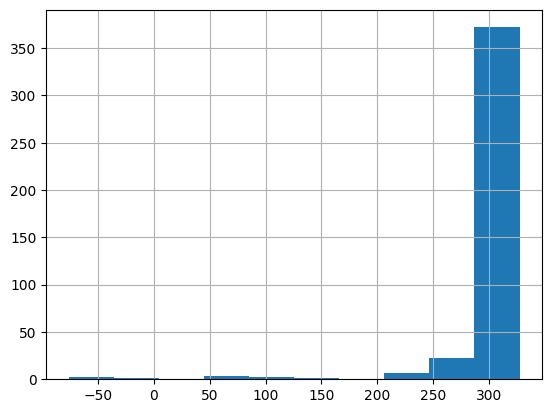

In [67]:
filtered_df['aln_score'].hist()

In [68]:
filtered_df.head()

,Sequence number,Sequence ID,V-DOMAIN Functionality,V-GENE and allele,V-REGION score,V-REGION identity %,V-REGION identity nt,J-GENE and allele,J-REGION score,J-REGION identity %,...,CDR3-IMGT length,CDR-IMGT lengths,FR-IMGT lengths,AA JUNCTION,JUNCTION frame,Sequence,Analysed sequence length,Unnamed: 20,Unnamed: 21,aln_score
5,6,GTGGTAAATTGAAGGAT|PRCONS=TS-shift2|SEQORIENT=F|CR,productive,Musmus IGKV6-15*01 F,1368.0,98.92,276/279 nt,Musmus IGKJ4*01 F,156.0,96.97,...,9,6.3.9,[26.17.36.8],CQQYHNYPFTF,in-frame,ggaaatacatcagatcagcatgggcatcaagatggagtcacagact...,408.0,NaN,NaN,317.4
11,12,GAGGTACGGCGAGACGA|PRCONS=TS-shift1|SEQORIENT=F|CR,productive,Musmus IGKV6-15*01 F,1386.0,99.64,278/279 nt,Musmus IGKJ4*01 F,156.0,96.97,...,9,6.3.9,[26.17.36.8],CQQYNSYPFTF,in-frame,ggaaatacatcagatcagcatgggcatcaagatggagtcacagact...,408.0,NaN,NaN,321.4
32,33,TAGGTTGAAAAAGATGG|PRCONS=TS-shift2|SEQORIENT=F|CR,productive,Musmus IGKV6-15*01 F,1386.0,99.64,278/279 nt,Musmus IGKJ4*01 F,156.0,96.97,...,9,6.3.9,[26.17.36.8],CQQYNSYPFTF,in-frame,gaaatacatcagatcagcatgggcatcaagatggagtcacagactc...,407.0,NaN,NaN,321.5
148,149,TGTCCTGGGTCAGCAAA|PRCONS=TS-shift2|SEQORIENT=F|CR,productive,Musmus IGKV6-15*01 F,1395.0,100.00,279/279 nt,Musmus IGKJ4*01 F,150.0,100.00,...,9,6.3.9,[26.17.36.8],CQQYNSYPLTF,in-frame,aaatacatcagatcagcatgggcatcaagatggagtcacagactca...,406.0,NaN,NaN,327.6
218,219,GTTGTTGGCTCTACTAA|PRCONS=TS-shift1|SEQORIENT=F|CR,productive,Musmus IGKV6-15*01 F,1341.0,97.85,273/279 nt,Musmus IGKJ4*01 F,151.0,96.88,...,9,6.3.9,[26.17.36.8],CQQYNSYPFTF,in-frame,ggaaatacatcagatcagcatgggcatcaagatggagtcacagact...,407.0,NaN,NaN,308.3


In [69]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

# Extract the first sequence from the DataFrame
first_sequence = filtered_df.iloc[0]['Sequence']

# Compute the alignment
alignments = pairwise2.align.globalms(chigy_lc_stop.lower(), first_sequence.lower(), 1, -1, -4, -0.1)

# Print the alignment
print(format_alignment(*alignments[0]))


------------------------------catggagtcacagactcaggtctttgta--------------gttgtctggtgttgatggagacattgtgatgactcagtctcaaaaattcatgtccacatcagtaggagacagggtcagcgtcacctgcaaggccagtcagaatgtgggtactaatgtagcctggtatcaacagaaaccagggcaatctcctaaagcactgatttactcggcatcctacaggtacagtggagtccctgatcgcttcacaggcagtggatctgggacagatttcactctcaccatcagcaatgtgcagtctgaagacttggcagagtatttctgtcagcaatataacagctatcctctcacgttcggctcggggactaagctagaaataaaacgtaagtacacttttctcatctttttttatgtgtaagacacaggttttgca
                              .|||||||||||||||||||||||||||              |||||||||||||||||||||||||||||||||.||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||.|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||.|||||||||||||||||||||||||||||||||||||||||||.|||.||||||..|||||||||||||||||||.|||.|.|||||                                                       
ggaaatacatcagatcagcatgggcatcaagatggagtcacagactcaggtctttgtatacatgttgctgtg

In [54]:
original_chigy = "GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTCAGACTCTGTCCCTCACCTGTTCTGTCACTGGCGACTCCATCACCAGTGGTTACTGGAACTGGATCCGGAAATTCCCAGGGAATAAACTTGAGTACATGGGGTACATAAGCTACAGTGGTAGCACTTACTACAATCCATCTCTCAAAAGTCGAATCTCCATCACTCGAGACACATCCAAGAACCAGTACTACCTGCAGTTGAATTCTGTGACTACTGAGGACACAGCCACATATTACTGTGCAAGGGACTTCGATGTCTGGGGCGCAGGGACCACGGTCACCGTCTCCTCAGACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAGGAGACAGGGTCAGCGTCACCTGCAAGGCCAGTCAGAATGTGGGTACTAATGTAGCCTGGTATCAACAGAAACCAGGGCAATCTCCTAAAGCACTGATTTACTCGGCATCCTACAGGTACAGTGGAGTCCCTGATCGCTTCACAGGCAGTGGATCTGGGACAGATTTCACTCTCACCATCAGCAATGTGCAGTCTGAAGACTTGGCAGAGTATTTCTGTCAGCAATATAACAGCTATCCTCTCACGTTCGGCTCGGGGACTAAGCTAGAAATAAAA"
original_chigy_light = "GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAGGAGACAGGGTCAGCGTCACCTGCAAGGCCAGTCAGAATGTGGGTACTAATGTAGCCTGGTATCAACAGAAACCAGGGCAATCTCCTAAAGCACTGATTTACTCGGCATCCTACAGGTACAGTGGAGTCCCTGATCGCTTCACAGGCAGTGGATCTGGGACAGATTTCACTCTCACCATCAGCAATGTGCAGTCTGAAGACTTGGCAGAGTATTTCTGTCAGCAATATAACAGCTATCCTCT CACGTTCGGCTCGGGGACTAAGCTAGAAATAAAA"

alignments = pairwise2.align.globalms(chigy_lc_stop.lower(), original_chigy_light.lower(), 1, -1, -0.5, -0.1)

print(format_alignment(*alignments[0]))

catggagtcacagactcaggtctttgtagttgtctggtgttgatggagacattgtgatgactcagtctcaaaaattcatgtccacatcagtaggagacagggtcagcgtcacctgcaaggccagtcagaatgtgggtactaatgtagcctggtatcaacagaaaccagggcaatctcctaaagcactgatttactcggcatcctacaggtacagtggagtccctgatcgcttcacaggcagtggatctgggacagatttcactctcaccatcagcaatgtgcagtctgaagacttggcagagtatttctgtcagcaatataacagctatcctct-cacgttcggctcggggactaagctagaaataaaacgtaagtacacttttctcatctttttttatgtgtaagacacaggttttgca
                                               ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||| |||||||||||||||||||||||||||||||||                                                   |
-----------------------------------------------gacattgtgatgactcagtctcaaaaattcatgtccacatcagtaggagacagggtcagcgtcacctgcaaggccagtcagaatgtgggtactaatgtagcctggtatcaa

In [57]:
len("tggagtcacagactcaggtctttgtagttgtctggtgttgatgga")

15.0

In [ ]:
>IGKV6-15*chg
GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAGGAGACAGGGTCAGCGTCACCTGCAAGGCCAGTCAGAATGTGGGTACTAATGTAGCCTGGTATCAACAGAAACCAGGGCAATCTCCTAAAGCACTGATTTACTCGGCATCCTACAGGTACAGTGGAGTCCCTGATCGCTTCACAGGCAGTGGATCTGGGACAGATTTCACTCTCACCATCAGCAATGTGCAGTCTGAAGACTTGGCAGAGTATTTCTGTCAGCAATATAACAGCTATCCTCT
>IGKJ4*chg
CACGTTCGGCTCGGGGACTAAGCTAGAAATAAAA

In [ ]:
original_chigy_light = "GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAGGAGACAGGGTCAGCGTCACCTGCAAGGCCAGTCAGAATGTGGGTACTAATGTAGCCTGGTATCAACAGAAACCAGGGCAATCTCCTAAAGCACTGATTTACTCGGCATCCTACAGGTACAGTGGAGTCCCTGATCGCTTCACAGGCAGTGGATCTGGGACAGATTTCACTCTCACCATCAGCAATGTGCAGTCTGAAGACTTGGCAGAGTATTTCTGTCAGCAATATAACAGCTATCCTCT CACGTTCGGCTCGGGGACTAAGCTAGAAATAAAA"